# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ ‚Ññ 9

### –ó–∞–¥–∞–Ω–∏–µ 1 (5 –±–∞–ª–ª–æ–≤).
–≠—Ç–æ –∑–∞–¥–∞–Ω–∏–µ –æ—Å–Ω–æ–≤–∞–Ω–æ –Ω–∞ —ç—Ç–æ–π —Ç–µ—Ç—Ä–∞–¥–∫–µ - https://github.com/mannefedov/compling_nlp_hse_course/blob/master/notebooks/transfer_learning_hg/Fine_tunining_pretrained_LMs.ipynb

–î–æ–æ–±—É—á–∏—Ç–µ 3 –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ –∏ –≤ —Å–µ–º–∏–Ω–∞—Ä–µ. –°—Ä–∞–≤–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –∏ –≤—ã–±–µ—Ä–∏—Ç–µ –ª—É—á—à—É—é.
–ú–æ–¥–µ–ª–∏ –¥–æ–ª–∂–Ω—ã –æ—Ç–ª–∏—á–∞—Ç—å—Å—è –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ –Ω–µ —Ç–æ–ª—å–∫–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ ru/en/multilingual, base/large, cased/uncased. –í—Å–µ —Ç—Ä–∏ –≤—ã–±—Ä–∞–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ –¥–æ–ª–∂–Ω—ã —Ä–∞–±–æ—Ç–∞—Ç—å –ª—É—á—à–µ, —á–µ–º –±–µ–π–∑–ª–∞–π–Ω –±–µ–∑ –¥–æ–æ–±—É—á–µ–Ω–∏—è (—Ç.–µ. –µ—Å–ª–∏ –º–æ–¥–µ–ª—å –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç, –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –¥—Ä—É–≥—É—é).


#### –ò–Ω—Å—Ç–∞–ª—ã

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install --upgrade keras
# !pip install torch torchvision torchaudio
# !pip install scikit-learn pandas matplotlib transformers -U

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 9.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 286.8/286.8 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


#### –ò–º–ø–æ—Ä—Ç—ã

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import keras
print(keras.__version__)

3.1.1


In [ ]:
# —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import os, re
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
%matplotlib inline


import keras, torch
from transformers import AutoModel
from transformers import AutoTokenizer

from sklearn.metrics import classification_report

#### –î–∞–Ω–Ω—ã–µ

–í–æ–∑—å–º–µ–º –¥–∞–Ω–Ω—ã–µ lenta.ru, –Ω–æ –Ω–µ —Ü–µ–ª–∏–∫–æ–º. Fine-tuning –±–æ–ª—å—à–∏—Ö –º–æ–¥–µ–ª–µ–π –ª—É—á—à–µ –≤—Å–µ–≥–æ –ø–æ–¥—Ö–æ–¥–∏—Ç, –∫–æ–≥–¥–∞ –¥–∞–Ω–Ω—ã—Ö —Å–æ–≤—Å–µ–º –º–∞–ª–æ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º –∞–ª–≥–æ—Ä–∏—Ç–º–∞–º –ø—Ä–æ—Å—Ç–æ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, —á—Ç–æ–±—ã –æ–±—É—á–∏—Ç—å—Å—è. –ü–æ—ç—Ç–æ–º—É –≤–æ–∑—å–º–µ–º —Ç–æ–ª—å–∫–æ –Ω–µ–±–æ–ª—å—à–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö.

In [ ]:
# data_frac = pd.concat([data[data.topic=='–†–æ—Å—Å–∏—è'].sample(frac=0.001),
#                       data[data.topic=='–ú–∏—Ä'].sample(frac=0.001),
#                       data[data.topic=='–≠–∫–æ–Ω–æ–º–∏–∫–∞'].sample(frac=0.002),
#                       data[data.topic=='–°–ø–æ—Ä—Ç'].sample(frac=0.003),
#                       data[data.topic=='–ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞'].sample(frac=0.005),
#                       data[data.topic=='–ë—ã–≤—à–∏–π –°–°–°–†'].sample(frac=0.005),
#                       data[data.topic=='–ö—É–ª—å—Ç—É—Ä–∞'].sample(frac=0.005),
#                       data[data.topic=='–ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –°–ú–ò'].sample(frac=0.005),
#                       data[data.topic=='–ò–∑ –∂–∏–∑–Ω–∏'].sample(frac=0.01),
#                       data[data.topic=='–î–æ–º'].sample(frac=0.01),
#                       data[data.topic=='–°–∏–ª–æ–≤—ã–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã'].sample(frac=0.01),
#                       data[data.topic=='–¶–µ–Ω–Ω–æ—Å—Ç–∏'].sample(frac=0.03),
#                       data[data.topic=='–ë–∏–∑–Ω–µ—Å'].sample(frac=0.03),
#                       data[data.topic=='69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å'].sample(frac=0.05),
#                       data[data.topic=='–ö—Ä—ã–º'].sample(frac=0.05),
#                       data[data.topic=='–ö—É–ª—å—Ç–ø—Ä–æ—Å–≤–µ—Ç'].sample(frac=0.2),
#                       data[data.topic=='–õ–µ–≥–ø—Ä–æ–º'].sample(frac=0.8),
#                       data[data.topic=='–ë–∏–±–ª–∏–æ—Ç–µ–∫–∞']]).reset_index(drop=True)

In [ ]:
url = 'https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/notebooks/transfer_learning_hg/lenta_sample.csv'
data = pd.read_csv(url)
data.dropna(subset=['topic', 'text'], inplace=True)

In [ ]:
data.topic.value_counts()

topic
–ò–∑ –∂–∏–∑–Ω–∏             55
–ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞      54
–ë—ã–≤—à–∏–π –°–°–°–†          54
–ö—É–ª—å—Ç—É—Ä–∞             53
–¶–µ–Ω–Ω–æ—Å—Ç–∏             45
–î–æ–º                  45
–ë–∏–∑–Ω–µ—Å               44
–ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –°–ú–ò       44
–°–∏–ª–æ–≤—ã–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã    40
–°–ø–æ—Ä—Ç                39
–†–æ—Å—Å–∏—è               32
–≠–∫–æ–Ω–æ–º–∏–∫–∞            32
–ú–∏—Ä                  27
69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å       13
–õ–µ–≥–ø—Ä–æ–º              13
–ë–∏–±–ª–∏–æ—Ç–µ–∫–∞           10
–ö—Ä—ã–º                  7
Name: count, dtype: int64

In [ ]:
data.shape

(607, 6)

#### LSTM –±–µ–π–∑–ª–∞–π–Ω

In [ ]:

def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

vocab = Counter()

for text in data.title:
    vocab.update(preprocess(text))

# –∏–Ω–¥–µ–∫—Å–∏—Ä—É–µ–º —Å–ª–æ–≤–∞
word2id = {'PAD':0}

for word in vocab:
    word2id[word] = len(word2id)

id2word = {i:word for word, i in word2id.items()}

X = []

for text in data.title:
    tokens = preprocess(text)
    ids = [word2id[token] for token in tokens]
    X.append(ids)

MAX_LEN = max(len(x) for x in X)


# –ø–∞–¥–¥–∏–Ω–≥
X = keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=MAX_LEN)


id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = keras.utils.to_categorical([label2id[label] for label in data.topic.values])


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, stratify=data.topic)

In [ ]:
# if no gpu memory left
# del model_rubert
# torch.cuda.empty_cache()

In [ ]:
inputs = keras.layers.Input(shape=(MAX_LEN,))
embeddings = keras.layers.Embedding(input_dim=len(word2id), output_dim=30)(inputs, )

lstm = keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=False))(embeddings)
drop = keras.layers.Dropout(0.3)(lstm)
outputs = keras.layers.Dense(len(label2id), activation='softmax')(drop)

model = keras.Model(inputs=inputs, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)             ‚îÇ (None, 13)                  ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding (Embedding)                ‚îÇ (None, 13, 30)              ‚îÇ          93,060 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)        ‚îÇ (None, 256)                 ‚îÇ         162,816 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 256)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 17)                  ‚îÇ           4,369 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 260,245 (1016.58 KB)

 Trainable params: 260,245 (1016.58 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=32,
          epochs=50)

Epoch 1/50
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 125ms/step - accuracy: 0.0995 - loss: 2.8206 - val_accuracy: 0.0968 - val_loss: 2.7270
Epoch 2/50
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 99ms/step - accuracy: 0.0900 - loss: 2.7410 - val_accuracy: 0.0968 - val_loss: 2.6775
Epoch 3/50
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 109ms/step - accuracy: 0.1052 - loss: 2.6907 - val_accuracy: 0.1613 - val_loss: 2.6429
Epoch 4/50
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 78ms/step - accuracy: 0.1538 - loss: 2.5118 - val_accuracy: 0.0323 - val_loss: 2.7919
Epoch 5/50
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 103ms/step - accuracy: 0.2438 - loss: 2.1589 - val_accuracy: 0.0968 - val_loss: 2.7496
Epoch 6/50
18/18 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 106ms/step - accuracy: 0.2599 - loss: 2.0048 - val_accuracy: 0.1290 - val_loss: 2

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


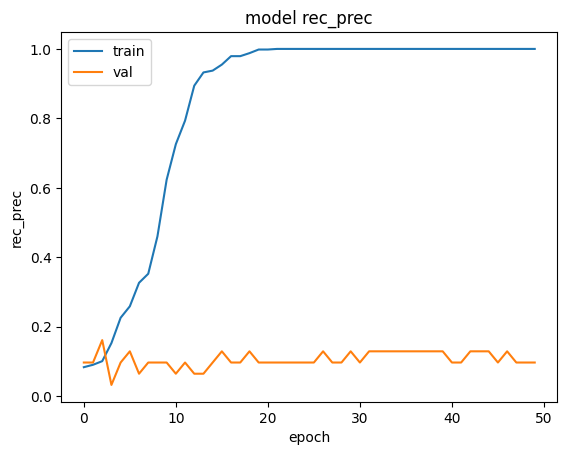

In [ ]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred = model.predict(X_valid, batch_size=5).argmax(1)

print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step
                   precision    recall  f1-score   support

      –ë—ã–≤—à–∏–π –°–°–°–†       0.00      0.00      0.00         3
           –ë–∏–∑–Ω–µ—Å       0.00      0.00      0.00         2
        –≠–∫–æ–Ω–æ–º–∏–∫–∞       0.00      0.00      0.00         2
   69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å       0.00      0.00      0.00         1
         –ò–∑ –∂–∏–∑–Ω–∏       0.00      0.00      0.00         3
          –õ–µ–≥–ø—Ä–æ–º       0.00      0.00      0.00         1
              –î–æ–º       0.00      0.00      0.00         2
              –ú–∏—Ä       0.10      1.00      0.18         1
            –°–ø–æ—Ä—Ç       0.00      0.00      0.00         2
           –†–æ—Å—Å–∏—è       0.00      0.00      0.00         2
  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞       0.00      0.00      0.00         3
       –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞       0.00      0.00      0.00         0
         –¶–µ–Ω–Ω–æ—Å—Ç–∏       1.00      1.00      1.00         

#### –ú–æ–¥–µ–ª—å 1. DeepPavlov/rubert-base-cased

In [ ]:
from transformers import pipeline

pipe = pipeline("feature-extraction", model="DeepPavlov/rubert-base-cased")

from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model_rubert = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
data.loc[4, 'title']

'–ü–æ —Ñ–∞–∫—Ç—É –ø–æ–∂–∞—Ä–∞ –Ω–∞\xa0–∑–∞–≤–æ–¥–µ –≤\xa0–Æ–≥—Ä–µ –∑–∞–≤–µ–¥–µ–Ω–æ –¥–µ–ª–æ'

–ü–µ—Ä–µ–≤–µ—Å—Ç–∏ —Ç–æ–∫–µ–Ω—ã –≤ –∏–Ω–¥–µ–∫—Å—ã –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ

In [ ]:
tokenizer.encode(data.loc[4, 'title'])

[101, 3099, 20615, 19842, 1469, 16543, 845, 25564, 2076, 62742, 10673, 102]

–í —ç—Ç–∏—Ö –º–æ–¥–µ–ª—è—Ö –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è BPE

In [ ]:
# –ø–µ—Ä–µ–≤–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å —Ç–æ–∫–µ–Ω–∞ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Ç–µ–∫—Å—Ç
encoded = tokenizer.encode(data.loc[4, 'title'])
[tokenizer.decode([x]) for x in encoded]

['[CLS]',
 '–ü–æ',
 '—Ñ–∞–∫—Ç—É',
 '–ø–æ–∂–∞—Ä–∞',
 '–Ω–∞',
 '–∑–∞–≤–æ–¥–µ',
 '–≤',
 '–Æ–≥',
 '##—Ä–µ',
 '–∑–∞–≤–µ–¥–µ–Ω–æ',
 '–¥–µ–ª–æ',
 '[SEP]']

–ò–Ω–¥–µ–∫—Å—ã –º–æ–∂–Ω–æ –Ω–∞–ø—Ä—è–º—É—é –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª—å.

In [ ]:
text = data.loc[4, 'title']
text_ids = tokenizer.encode(text, add_special_tokens=True,
                            return_tensors='pt') # –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ç–æ—Ä—á —Ñ–æ—Ä–º–∞—Ç
output = model_rubert(text_ids, output_attentions=False)

–ù–∞ –≤—ã—Ö–æ–¥–µ –º—ã –ø–æ–ª—É—á–∏–º tuple –∏–∑ –¥–≤—É—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤.

–ü–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç - —Å–æ—Å—Ç–æ—è–Ω–∏—è –µ–Ω–∫–æ–¥–µ—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

In [ ]:
output[0].size() # –≤ –ø–∞–π—Ç–æ—Ä—á–µ –≤–º–µ—Å—Ç–æ .shape –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è size()
output[0].shape # –Ω–æ shape —Ç–æ–∂–µ —Ä–∞–±–æ—Ç–∞–µ—Ç

torch.Size([1, 12, 768])

–í—Ç–æ—Ä–æ–π - —Å–æ—Å—Ç–æ—è–Ω–∏–µ –µ–Ω–∫–æ–¥–µ—Ä–∞ –Ω–∞ –ø–µ—Ä–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–µ, –ø—Ä–æ–ø—É—â–µ–Ω–Ω–æ–µ —á–µ—Ä–µ–∑ –∞–∫—Ç–∏–≤–∞—Ü–∏—é (–æ–±—ã—á–Ω–æ —ç—Ç–æ—Ç —ç–ª–µ–º–µ–Ω—Ç –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç)

In [ ]:
# –≤ –¥–∏—Å—Ç–∏–ª–±–µ—Ä—Ç –µ–≥–æ —Å–æ–≤—Å–µ–º –Ω–µ—Ç, –ø–æ—ç—Ç–æ–º—É –±—É–¥–µ—Ç –æ—à–∏–±–∫–∞
# output[1].shape

–û–±—ã—á–Ω–æ –≤ –∑–∞–¥–∞—á–∞—Ö –∏—Å–ø–æ–ª—å–∑—É—é—Ç –ª–∏–±–æ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞

In [ ]:
output[0][:,0].shape

torch.Size([1, 768])

–õ–∏–±–æ —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ

In [ ]:
output[0].mean(axis=1).shape

torch.Size([1, 768])

–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —É–∂–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ –ø–æ–∏—Å–∫–∞ –ø–æ—Ö–æ–∂–∏—Ö. –ê –µ—Å–ª–∏ –µ—Å—Ç—å —Ä–∞–∑–º–µ—Ç–∫–∞, —Ç–æ –º–æ–∂–Ω–æ –æ–±—É—á–∏—Ç—å –Ω–∞ —ç—Ç–∏—Ö –≤–µ–∫—Ç–æ—Ä–∞—Ö —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—É—é –º–æ–¥–µ–ª—å –∏–∑ sklearn –∏–ª–∏ –¥–∞–∂–µ –¥–æ–æ–±—É—á–∏—Ç—å –≤—Å–µ–≥–æ –ë–µ—Ä—Ç–∞ –ø–æ–¥ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—É—é –∑–∞–¥–∞—á—É!

–î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –¥–æ–æ–±—É—á–∏—Ç—å (fine-tune) –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö lenta ru

–ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞—Ö, –∞ –Ω–µ –Ω–∞ —Å–∞–º–∏—Ö —Ç–µ–∫—Å—Ç–∞—Ö

In [ ]:
# –ø–µ—Ä–µ–≤–æ–¥–∏–º —Ç–µ–∫—Å—Ç—ã –≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–Ω–¥–µ–∫—Å–æ–≤
# –£ –±–µ—Ä—Ç–∞ –µ—Å—Ç—å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –¥–ª–∏–Ω—É –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ - 512
# –î–ª—è –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ —ç—Ç–æ –Ω–µ –æ—á–µ–Ω—å –∞–∫—Ç—É–∞–ª—å–Ω–æ, –Ω–æ –¥–ª—è –¥—Ä—É–≥–∏—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è

X = []

for text in data.title:
    ids = tokenizer.encode(text)

    X.append(ids[:512])

In [ ]:
X = keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [ ]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = keras.utils.to_categorical([label2id[label] for label in data.topic.values])


In [ ]:
X.shape

(607, 512)

–í —ç—Ç–æ—Ç —Ä–∞–∑ –¥–æ–±–∞–≤–∏–º —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é, —Ç.–∫. –≤ –¥–∞–Ω–Ω—ã—Ö —É –Ω–∞—Å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤.

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [ ]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

–î–æ–æ–±—É—á–µ–Ω–∏–µ –±–µ–∑ –∑–∞–º–æ—Ä–∞–∂–∏–≤–∞–Ω–∏—è

In [ ]:
model_rubert = AutoModel.from_pretrained('distilbert-base-multilingual-cased')

# –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –≤–µ—Å–∞ –æ–±—É—á–∞–µ–º—ã–µ –ø–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –∑–∞–≥—Ä—É–∑–∏—Ç—å –º–æ–¥–µ–ª—å


config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

In [ ]:
# —Å huggingface –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–∏–ø BaseModelOutput
# –∫–æ—Ç–æ—Ä—ã–π —è–≤–ª—è–µ—Ç—Å—è tuple –∫–∞–∫ –º—ã –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –≤—ã—à–µ
# –∏ —ç—Ç–æ –Ω–µ–º–Ω–æ–≥–æ –ª–æ–º–∞–µ—Ç —Ä–∞—Å—á–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π –≤ –∫–µ—Ä–∞—Å–µ –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –ø—ã—Ç–∞–µ—Ç—Å—è –≤—ã—Ç–∞—â–∏—Ç—å —ç—Ç—É —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å
# –ø–æ –∞—Ç—Ä–∏–±—É—Ç—É .shape –∞ BaseModelOutput –Ω–µ—Ç —Ç–∞–∫–æ–≥–æ
# —ç—Ç–æ—Ç –∞—Ç—Ä–∏–±—É—Ç –µ—Å—Ç—å —É —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —ç—Ç–æ–≥–æ tuple –ø–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å –≤–æ—Ç —Ç–∞–∫—É—é –ø—Ä–æ—Å—Ç—É—é –æ–±–µ—Ä—Ç–∫—É
# –∫–æ—Ç–æ—Ä–∞—è –≤—ã–∑–æ–≤–µ—Ç –º–æ–¥–µ–ª—å –∏ –≤–µ—Ä–Ω–µ—Ç –ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç tuple
class rubert_wrapper(keras.Model):
    def __init__(self, model_rubert, **kwargs):
        super().__init__(**kwargs)
        # –º–æ–¥–µ–ª—å –Ω—É–∂–Ω–æ –æ–±–µ—Ä–Ω—É—Ç—å –≤ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π –∫–ª–∞—Å—Å —á—Ç–æ–±—ã –æ–Ω–∞ –±—ã–ª–∞ —Å–æ–≤–º–µ—Å—Ç–∏–º–∞ —Å –¥—Ä—É–≥–∏–º–∏ –∫–µ—Ä–∞—Å —Å–ª–æ—è–º–∏
        self.model_rubert = keras.layers.TorchModuleWrapper(model_rubert)

    def call(self, inputs):
        x = self.model_rubert(inputs)
        return x[0]

In [ ]:
input_word_ids = keras.layers.Input(shape=(512,), dtype='int32',
                                     name="input_ids")

output = rubert_wrapper(model_rubert)(input_word_ids)
# –±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ —Å–∞–º—ã–π –ø–µ—Ä–≤—ã–π –≤–µ–∫—Ç–æ—Ä (CLS —Ç–æ–∫–µ–Ω)
drop = keras.layers.Dropout(0.1)(output[:, 0])
dense = keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(keras.optimizers.Adam(learning_rate=2e-5,
                                    ),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])




In [ ]:
if torch.cuda.is_available():
    model_clf.to('cuda')

–ë–∞—Ç—á —Å–∞–π–∑ –Ω—É–∂–Ω–æ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –µ—â–µ –º–µ–Ω—å—à–µ

In [ ]:
# –µ—Å–ª–∏ –µ—Å—Ç—å –æ—à–∏–±–∫–∞ —Å device meta —Ç–æ –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å –µ—â–µ —Ä–∞–∑
model_clf.fit(torch.LongTensor(X_train), torch.LongTensor(y_train),
          validation_data=(torch.LongTensor(X_valid), torch.LongTensor(y_valid)),
          batch_size=4,
          epochs=10)

Epoch 1/10


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


144/144 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 266ms/step - accuracy: 0.0825 - loss: 2.8749 - rec_prec: 0.0000e+00 - val_accuracy: 0.0645 - val_loss: 2.7027 - val_rec_prec: 0.0000e+00
Epoch 2/10
144/144 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 254ms/step - accuracy: 0.0779 - loss: 2.7730 - rec_prec: 0.0000e+00 - val_accuracy: 0.0968 - val_loss: 2.7142 - val_rec_prec: 0.0000e+00
Epoch 3/10
144/144 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 256ms/step - accuracy: 0.0659 - loss: 2.7375 - rec_prec: 3.7575e-04 - val_accuracy: 0.0645 - val_loss: 2.7083 - val_rec_prec: 0.0000e+00
Epoch 4/10
144/144 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 256ms/step - accuracy: 0.1073 - loss: 2.6327 - rec_prec: 0.0174 - val_accuracy: 0.0968 - val_loss: 2.6316 - val_rec_prec: 0.0645
Epoch 5/10
144/144 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 254ms/step - accuracy: 0.1665 - loss: 2.4965 - rec_

dict_keys(['accuracy', 'loss', 'rec_prec', 'val_accuracy', 'val_loss', 'val_rec_prec'])


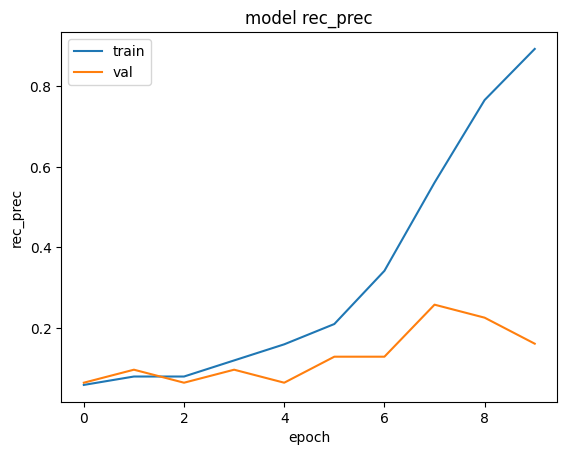

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 79ms/step


In [ ]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

      –ë—ã–≤—à–∏–π –°–°–°–†       0.00      0.00      0.00         3
           –ë–∏–∑–Ω–µ—Å       0.00      0.00      0.00         2
        –≠–∫–æ–Ω–æ–º–∏–∫–∞       0.00      0.00      0.00         2
   69-—è –ø–∞—Ä–∞–ª–ª–µ–ª—å       0.00      0.00      0.00         1
         –ò–∑ –∂–∏–∑–Ω–∏       0.29      0.67      0.40         3
          –õ–µ–≥–ø—Ä–æ–º       0.00      0.00      0.00         1
              –î–æ–º       0.00      0.00      0.00         2
              –ú–∏—Ä       0.00      0.00      0.00         1
            –°–ø–æ—Ä—Ç       0.00      0.00      0.00         2
           –†–æ—Å—Å–∏—è       0.00      0.00      0.00         2
  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞       0.20      0.67      0.31         3
       –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞       0.00      0.00      0.00         0
         –¶–µ–Ω–Ω–æ—Å—Ç–∏       0.00      0.00      0.00         2
   –ò–Ω—Ç–µ—Ä–Ω–µ—Ç –∏ –°–ú–ò       0.00      0.00      0.00         2
–°–∏–

#### –ú–æ–¥–µ–ª—å 2 bert-base-multilingual-uncased

In [ ]:
from transformers import pipeline

pipe = pipeline("feature-extraction", model="bert-base-multilingual-uncased")

from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased")
model = AutoModel.from_pretrained("bert-base-multilingual-uncased")

In [ ]:
data.loc[4, 'title']

–ü–µ—Ä–µ–≤–µ—Å—Ç–∏ —Ç–æ–∫–µ–Ω—ã –≤ –∏–Ω–¥–µ–∫—Å—ã –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ

In [ ]:
tokenizer.encode(data.loc[4, 'title'])

–í —ç—Ç–∏—Ö –º–æ–¥–µ–ª—è—Ö –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è BPE

In [ ]:
# –ø–µ—Ä–µ–≤–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å —Ç–æ–∫–µ–Ω–∞ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Ç–µ–∫—Å—Ç
encoded = tokenizer.encode(data.loc[4, 'title'])
[tokenizer.decode([x]) for x in encoded]

–ò–Ω–¥–µ–∫—Å—ã –º–æ–∂–Ω–æ –Ω–∞–ø—Ä—è–º—É—é –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª—å.

In [ ]:
text = data.loc[4, 'title']
text_ids = tokenizer.encode(text, add_special_tokens=True,
                            return_tensors='pt') # –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ç–æ—Ä—á —Ñ–æ—Ä–º–∞—Ç
output = model(text_ids, output_attentions=False)

–ù–∞ –≤—ã—Ö–æ–¥–µ –º—ã –ø–æ–ª—É—á–∏–º tuple –∏–∑ –¥–≤—É—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤.

–ü–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç - —Å–æ—Å—Ç–æ—è–Ω–∏—è –µ–Ω–∫–æ–¥–µ—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

In [ ]:
output[0].size() # –≤ –ø–∞–π—Ç–æ—Ä—á–µ –≤–º–µ—Å—Ç–æ .shape –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è size()
output[0].shape # –Ω–æ shape —Ç–æ–∂–µ —Ä–∞–±–æ—Ç–∞–µ—Ç

–í—Ç–æ—Ä–æ–π - —Å–æ—Å—Ç–æ—è–Ω–∏–µ –µ–Ω–∫–æ–¥–µ—Ä–∞ –Ω–∞ –ø–µ—Ä–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–µ, –ø—Ä–æ–ø—É—â–µ–Ω–Ω–æ–µ —á–µ—Ä–µ–∑ –∞–∫—Ç–∏–≤–∞—Ü–∏—é (–æ–±—ã—á–Ω–æ —ç—Ç–æ—Ç —ç–ª–µ–º–µ–Ω—Ç –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç)

In [ ]:
# –≤ –¥–∏—Å—Ç–∏–ª–±–µ—Ä—Ç –µ–≥–æ —Å–æ–≤—Å–µ–º –Ω–µ—Ç, –ø–æ—ç—Ç–æ–º—É –±—É–¥–µ—Ç –æ—à–∏–±–∫–∞
# output[1].shape

–û–±—ã—á–Ω–æ –≤ –∑–∞–¥–∞—á–∞—Ö –∏—Å–ø–æ–ª—å–∑—É—é—Ç –ª–∏–±–æ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞

In [ ]:
output[0][:,0].shape

–õ–∏–±–æ —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ

In [ ]:
output[0].mean(axis=1).shape

–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —É–∂–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ –ø–æ–∏—Å–∫–∞ –ø–æ—Ö–æ–∂–∏—Ö. –ê –µ—Å–ª–∏ –µ—Å—Ç—å —Ä–∞–∑–º–µ—Ç–∫–∞, —Ç–æ –º–æ–∂–Ω–æ –æ–±—É—á–∏—Ç—å –Ω–∞ —ç—Ç–∏—Ö –≤–µ–∫—Ç–æ—Ä–∞—Ö —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—É—é –º–æ–¥–µ–ª—å –∏–∑ sklearn –∏–ª–∏ –¥–∞–∂–µ –¥–æ–æ–±—É—á–∏—Ç—å –≤—Å–µ–≥–æ –ë–µ—Ä—Ç–∞ –ø–æ–¥ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—É—é –∑–∞–¥–∞—á—É!

–î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –¥–æ–æ–±—É—á–∏—Ç—å (fine-tune) –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö lenta ru

–ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞—Ö, –∞ –Ω–µ –Ω–∞ —Å–∞–º–∏—Ö —Ç–µ–∫—Å—Ç–∞—Ö

In [ ]:
# –ø–µ—Ä–µ–≤–æ–¥–∏–º —Ç–µ–∫—Å—Ç—ã –≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–Ω–¥–µ–∫—Å–æ–≤
# –£ –±–µ—Ä—Ç–∞ –µ—Å—Ç—å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –¥–ª–∏–Ω—É –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ - 512
# –î–ª—è –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ —ç—Ç–æ –Ω–µ –æ—á–µ–Ω—å –∞–∫—Ç—É–∞–ª—å–Ω–æ, –Ω–æ –¥–ª—è –¥—Ä—É–≥–∏—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è

X = []

for text in data.title:
    ids = tokenizer.encode(text)

    X.append(ids[:512])

In [ ]:
X = keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [ ]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = keras.utils.to_categorical([label2id[label] for label in data.topic.values])


In [ ]:
X.shape

–í —ç—Ç–æ—Ç —Ä–∞–∑ –¥–æ–±–∞–≤–∏–º —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é, —Ç.–∫. –≤ –¥–∞–Ω–Ω—ã—Ö —É –Ω–∞—Å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤.

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [ ]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

–î–æ–æ–±—É—á–µ–Ω–∏–µ –±–µ–∑ –∑–∞–º–æ—Ä–∞–∂–∏–≤–∞–Ω–∏—è

In [ ]:
model = AutoModel.from_pretrained('bert-base-multilingual-uncased')

# –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –≤–µ—Å–∞ –æ–±—É—á–∞–µ–º—ã–µ –ø–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –∑–∞–≥—Ä—É–∑–∏—Ç—å –º–æ–¥–µ–ª—å


In [ ]:
# —Å huggingface –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–∏–ø BaseModelOutput
# –∫–æ—Ç–æ—Ä—ã–π —è–≤–ª—è–µ—Ç—Å—è tuple –∫–∞–∫ –º—ã –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –≤—ã—à–µ
# –∏ —ç—Ç–æ –Ω–µ–º–Ω–æ–≥–æ –ª–æ–º–∞–µ—Ç —Ä–∞—Å—á–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π –≤ –∫–µ—Ä–∞—Å–µ –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –ø—ã—Ç–∞–µ—Ç—Å—è –≤—ã—Ç–∞—â–∏—Ç—å —ç—Ç—É —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å
# –ø–æ –∞—Ç—Ä–∏–±—É—Ç—É .shape –∞ BaseModelOutput –Ω–µ—Ç —Ç–∞–∫–æ–≥–æ
# —ç—Ç–æ—Ç –∞—Ç—Ä–∏–±—É—Ç –µ—Å—Ç—å —É —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —ç—Ç–æ–≥–æ tuple –ø–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å –≤–æ—Ç —Ç–∞–∫—É—é –ø—Ä–æ—Å—Ç—É—é –æ–±–µ—Ä—Ç–∫—É
# –∫–æ—Ç–æ—Ä–∞—è –≤—ã–∑–æ–≤–µ—Ç –º–æ–¥–µ–ª—å –∏ –≤–µ—Ä–Ω–µ—Ç –ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç tuple
class wrapper(keras.Model):
    def __init__(self, model, **kwargs):
        super().__init__(**kwargs)
        # –º–æ–¥–µ–ª—å –Ω—É–∂–Ω–æ –æ–±–µ—Ä–Ω—É—Ç—å –≤ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π –∫–ª–∞—Å—Å —á—Ç–æ–±—ã –æ–Ω–∞ –±—ã–ª–∞ —Å–æ–≤–º–µ—Å—Ç–∏–º–∞ —Å –¥—Ä—É–≥–∏–º–∏ –∫–µ—Ä–∞—Å —Å–ª–æ—è–º–∏
        self.model = keras.layers.TorchModuleWrapper(model)

    def call(self, inputs):
        x = self.model(inputs)
        return x[0]

In [ ]:
input_word_ids = keras.layers.Input(shape=(512,), dtype='int32',
                                     name="input_ids")

output = wrapper(model)(input_word_ids)
# –±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ —Å–∞–º—ã–π –ø–µ—Ä–≤—ã–π –≤–µ–∫—Ç–æ—Ä (CLS —Ç–æ–∫–µ–Ω)
drop = keras.layers.Dropout(0.1)(output[:, 0])
dense = keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(keras.optimizers.Adam(learning_rate=2e-5,
                                    ),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])




In [ ]:
if torch.cuda.is_available():
    model_clf.to('cuda')

–ë–∞—Ç—á —Å–∞–π–∑ –Ω—É–∂–Ω–æ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –µ—â–µ –º–µ–Ω—å—à–µ

In [ ]:
# –µ—Å–ª–∏ –µ—Å—Ç—å –æ—à–∏–±–∫–∞ —Å device meta —Ç–æ –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å –µ—â–µ —Ä–∞–∑
model_clf.fit(torch.LongTensor(X_train), torch.LongTensor(y_train),
          validation_data=(torch.LongTensor(X_valid), torch.LongTensor(y_valid)),
          batch_size=4,
          epochs=10)

In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

–ú–µ—Ç—Ä–∏–∫–∏ –ª—É—á—à–µ, —á–µ–º —É rubert

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)

In [ ]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

#### –ú–æ–¥–µ–ª—å 3. CUDA error –Ω–∞ —ç—Ç–∞–ø–µ model_clf.fit

In [ ]:
# CUDA error –Ω–∞ —ç—Ç–∞–ø–µ wrapper(model)

#tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-multilingual-cased")
#model = AutoModel.from_pretrained("google-bert/bert-base-multilingual-cased")

In [ ]:
# CUDA error –Ω–∞ —ç—Ç–∞–ø–µ wrapper(model)

#tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
#model = AutoModel.from_pretrained("distilbert/distilbert-base-uncased")

In [ ]:
# CUDA error –Ω–∞ —ç—Ç–∞–ø–µ wrapper(model)

#tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
#model = AutoModel.from_pretrained("cointegrated/rubert-tiny")

In [ ]:
# CUDA error –Ω–∞ —ç—Ç–∞–ø–µ model_clf.fit

# tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-multilingual-cased")
# model = AutoModel.from_pretrained("google-bert/bert-base-multilingual-cased")

CUDA error –Ω–∞ —ç—Ç–∞–ø–µ model_clf.fit

In [ ]:
from transformers import AutoTokenizer, AutoModel
# # # # –¥–∏—Å—Ç–∏–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–π (—Ç.–µ. —É–º–µ–Ω—å—à–µ–Ω–Ω—ã–π) –±–µ—Ä—Ç
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")
model = AutoModel.from_pretrained("distilbert-base-multilingual-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

In [ ]:
data.loc[4, 'title']

'–ü–æ —Ñ–∞–∫—Ç—É –ø–æ–∂–∞—Ä–∞ –Ω–∞\xa0–∑–∞–≤–æ–¥–µ –≤\xa0–Æ–≥—Ä–µ –∑–∞–≤–µ–¥–µ–Ω–æ –¥–µ–ª–æ'

–ü–µ—Ä–µ–≤–µ—Å—Ç–∏ —Ç–æ–∫–µ–Ω—ã –≤ –∏–Ω–¥–µ–∫—Å—ã –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ

In [ ]:
tokenizer.encode(data.loc[4, 'title'])

[101,
 11480,
 61481,
 10227,
 10297,
 62323,
 10179,
 10122,
 69060,
 543,
 539,
 63596,
 10205,
 10234,
 48467,
 29112,
 102]

–í —ç—Ç–∏—Ö –º–æ–¥–µ–ª—è—Ö –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è BPE

In [ ]:
# –ø–µ—Ä–µ–≤–æ–¥–∏–º –∏–Ω–¥–µ–∫—Å —Ç–æ–∫–µ–Ω–∞ –æ–±—Ä–∞—Ç–Ω–æ –≤ —Ç–µ–∫—Å—Ç
encoded = tokenizer.encode(data.loc[4, 'title'])
[tokenizer.decode([x]) for x in encoded]

['[CLS]',
 '–ü–æ',
 '—Ñ–∞–∫—Ç',
 '##—É',
 '–ø–æ',
 '##–∂–∞—Ä',
 '##–∞',
 '–Ω–∞',
 '–∑–∞–≤–æ–¥–µ',
 '–≤',
 '–Æ',
 '##–≥—Ä',
 '##–µ',
 '–∑–∞',
 '##–≤–µ–¥–µ–Ω–æ',
 '–¥–µ–ª–æ',
 '[SEP]']

–ò–Ω–¥–µ–∫—Å—ã –º–æ–∂–Ω–æ –Ω–∞–ø—Ä—è–º—É—é –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª—å.

In [ ]:
text = data.loc[4, 'title']
text_ids = tokenizer.encode(text, add_special_tokens=True,
                            return_tensors='pt') # –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ç–æ—Ä—á —Ñ–æ—Ä–º–∞—Ç
output = model(text_ids, output_attentions=False)

–ù–∞ –≤—ã—Ö–æ–¥–µ –º—ã –ø–æ–ª—É—á–∏–º tuple –∏–∑ –¥–≤—É—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤.

–ü–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç - —Å–æ—Å—Ç–æ—è–Ω–∏—è –µ–Ω–∫–æ–¥–µ—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏

In [ ]:
output[0].size() # –≤ –ø–∞–π—Ç–æ—Ä—á–µ –≤–º–µ—Å—Ç–æ .shape –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è size()
output[0].shape # –Ω–æ shape —Ç–æ–∂–µ —Ä–∞–±–æ—Ç–∞–µ—Ç

torch.Size([1, 17, 768])

–í—Ç–æ—Ä–æ–π - —Å–æ—Å—Ç–æ—è–Ω–∏–µ –µ–Ω–∫–æ–¥–µ—Ä–∞ –Ω–∞ –ø–µ—Ä–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–µ, –ø—Ä–æ–ø—É—â–µ–Ω–Ω–æ–µ —á–µ—Ä–µ–∑ –∞–∫—Ç–∏–≤–∞—Ü–∏—é (–æ–±—ã—á–Ω–æ —ç—Ç–æ—Ç —ç–ª–µ–º–µ–Ω—Ç –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç)

In [ ]:
# –≤ –¥–∏—Å—Ç–∏–ª–±–µ—Ä—Ç –µ–≥–æ —Å–æ–≤—Å–µ–º –Ω–µ—Ç, –ø–æ—ç—Ç–æ–º—É –±—É–¥–µ—Ç –æ—à–∏–±–∫–∞
# output[1].shape

–û–±—ã—á–Ω–æ –≤ –∑–∞–¥–∞—á–∞—Ö –∏—Å–ø–æ–ª—å–∑—É—é—Ç –ª–∏–±–æ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –ø–µ—Ä–≤–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞

In [ ]:
output[0][:,0].shape

torch.Size([1, 768])

–õ–∏–±–æ —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ

In [ ]:
output[0].mean(axis=1).shape

torch.Size([1, 768])

–ü–æ–ª—É—á–µ–Ω–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —É–∂–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ –ø–æ–∏—Å–∫–∞ –ø–æ—Ö–æ–∂–∏—Ö. –ê –µ—Å–ª–∏ –µ—Å—Ç—å —Ä–∞–∑–º–µ—Ç–∫–∞, —Ç–æ –º–æ–∂–Ω–æ –æ–±—É—á–∏—Ç—å –Ω–∞ —ç—Ç–∏—Ö –≤–µ–∫—Ç–æ—Ä–∞—Ö —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—É—é –º–æ–¥–µ–ª—å –∏–∑ sklearn –∏–ª–∏ –¥–∞–∂–µ –¥–æ–æ–±—É—á–∏—Ç—å –≤—Å–µ–≥–æ –ë–µ—Ä—Ç–∞ –ø–æ–¥ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—É—é –∑–∞–¥–∞—á—É!

–î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –¥–æ–æ–±—É—á–∏—Ç—å (fine-tune) –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö lenta ru

–ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞—Ö, –∞ –Ω–µ –Ω–∞ —Å–∞–º–∏—Ö —Ç–µ–∫—Å—Ç–∞—Ö

In [ ]:
# –ø–µ—Ä–µ–≤–æ–¥–∏–º —Ç–µ–∫—Å—Ç—ã –≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–Ω–¥–µ–∫—Å–æ–≤
# –£ –±–µ—Ä—Ç–∞ –µ—Å—Ç—å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –Ω–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –¥–ª–∏–Ω—É –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ - 512
# –î–ª—è –∑–∞–≥–æ–ª–æ–≤–∫–æ–≤ —ç—Ç–æ –Ω–µ –æ—á–µ–Ω—å –∞–∫—Ç—É–∞–ª—å–Ω–æ, –Ω–æ –¥–ª—è –¥—Ä—É–≥–∏—Ö –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è

X = []

for text in data.title:
    ids = tokenizer.encode(text)

    X.append(ids[:512])

In [ ]:
X = keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [ ]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = keras.utils.to_categorical([label2id[label] for label in data.topic.values])


In [ ]:
X.shape

(607, 512)

–í —ç—Ç–æ—Ç —Ä–∞–∑ –¥–æ–±–∞–≤–∏–º —Å—Ç—Ä–∞—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é, —Ç.–∫. –≤ –¥–∞–Ω–Ω—ã—Ö —É –Ω–∞—Å –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤.

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [ ]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

–î–æ–æ–±—É—á–µ–Ω–∏–µ –±–µ–∑ –∑–∞–º–æ—Ä–∞–∂–∏–≤–∞–Ω–∏—è

In [ ]:
model = AutoModel.from_pretrained('bert-base-multilingual-uncased')

# –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –≤–µ—Å–∞ –æ–±—É—á–∞–µ–º—ã–µ –ø–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –∑–∞–≥—Ä—É–∑–∏—Ç—å –º–æ–¥–µ–ª—å


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [ ]:
# —Å huggingface –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–∏–ø BaseModelOutput
# –∫–æ—Ç–æ—Ä—ã–π —è–≤–ª—è–µ—Ç—Å—è tuple –∫–∞–∫ –º—ã –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –≤—ã—à–µ
# –∏ —ç—Ç–æ –Ω–µ–º–Ω–æ–≥–æ –ª–æ–º–∞–µ—Ç —Ä–∞—Å—á–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π –≤ –∫–µ—Ä–∞—Å–µ –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω –ø—ã—Ç–∞–µ—Ç—Å—è –≤—ã—Ç–∞—â–∏—Ç—å —ç—Ç—É —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å
# –ø–æ –∞—Ç—Ä–∏–±—É—Ç—É .shape –∞ BaseModelOutput –Ω–µ—Ç —Ç–∞–∫–æ–≥–æ
# —ç—Ç–æ—Ç –∞—Ç—Ä–∏–±—É—Ç –µ—Å—Ç—å —É —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —ç—Ç–æ–≥–æ tuple –ø–æ—ç—Ç–æ–º—É –Ω—É–∂–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å –≤–æ—Ç —Ç–∞–∫—É—é –ø—Ä–æ—Å—Ç—É—é –æ–±–µ—Ä—Ç–∫—É
# –∫–æ—Ç–æ—Ä–∞—è –≤—ã–∑–æ–≤–µ—Ç –º–æ–¥–µ–ª—å –∏ –≤–µ—Ä–Ω–µ—Ç –ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç tuple
class wrapper(keras.Model):
    def __init__(self, model, **kwargs):
        super().__init__(**kwargs)
        # –º–æ–¥–µ–ª—å –Ω—É–∂–Ω–æ –æ–±–µ—Ä–Ω—É—Ç—å –≤ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π –∫–ª–∞—Å—Å —á—Ç–æ–±—ã –æ–Ω–∞ –±—ã–ª–∞ —Å–æ–≤–º–µ—Å—Ç–∏–º–∞ —Å –¥—Ä—É–≥–∏–º–∏ –∫–µ—Ä–∞—Å —Å–ª–æ—è–º–∏
        self.model = keras.layers.TorchModuleWrapper(model)

    def call(self, inputs):
        x = self.model(inputs)
        return x[0]

In [ ]:
input_word_ids = keras.layers.Input(shape=(512,), dtype='int32',
                                     name="input_ids")

output = wrapper(model)(input_word_ids)
# –±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ —Å–∞–º—ã–π –ø–µ—Ä–≤—ã–π –≤–µ–∫—Ç–æ—Ä (CLS —Ç–æ–∫–µ–Ω)
drop = keras.layers.Dropout(0.1)(output[:, 0])
dense = keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_clf = keras.Model(inputs=input_word_ids, outputs=dense)


model_clf.compile(keras.optimizers.Adam(learning_rate=2e-5,
                                    ),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])




In [ ]:
if torch.cuda.is_available():
    model_clf.to('cuda')

–ë–∞—Ç—á —Å–∞–π–∑ –Ω—É–∂–Ω–æ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –µ—â–µ –º–µ–Ω—å—à–µ

In [ ]:
# –µ—Å–ª–∏ –µ—Å—Ç—å –æ—à–∏–±–∫–∞ —Å device meta —Ç–æ –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –∑–∞–ø—É—Å—Ç–∏—Ç—å –µ—â–µ —Ä–∞–∑
model_clf.fit(torch.LongTensor(X_train), torch.LongTensor(y_train),
          validation_data=(torch.LongTensor(X_valid), torch.LongTensor(y_valid)),
          batch_size=4,
          epochs=10)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
print(model_clf.history.history.keys())
plt.plot(model_clf.history.history['accuracy'])
plt.plot(model_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_clf.predict(X_valid, batch_size=5).argmax(1)

In [ ]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

### –ó–∞–¥–∞–Ω–∏–µ 2 (5 –±–∞–ª–ª–æ–≤).

–≠—Ç–æ –∑–∞–¥–∞–Ω–∏–µ –æ—Å–Ω–æ–≤–∞–Ω–æ –Ω–∞ —ç—Ç–æ–π —Ç–µ—Ç—Ä–∞–¥–∫–µ - https://github.com/mannefedov/compling_nlp_hse_course/blob/master/notebooks/gpt/gpt.ipynb

–ü–æ–ø—Ä–æ–±—É–π—Ç–µ –¥–æ–æ–±—É—á–∞—Ç—å GPT –Ω–∞ –∫–∞–∫–æ–º-—Ç–æ –¥—Ä—É–≥–æ–º —Ç–µ–∫—Å—Ç–µ (–º–æ–∂–µ—Ç–µ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ª—é–±—ã–µ —Å—Ç–∏—Ö–∏ –∏–ª–∏ –∫–∞–∫–∏–µ-—Ç–æ —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω—ã–µ –≤–µ—â–∏ –≤—Ä–æ–¥–µ –∞–Ω–µ–∫–¥–æ—Ç–æ–≤ –∏–ª–∏ —Ä–µ–ø–∞).
–ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Ä–∞–∑–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ (beam search, —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, top_k –∏ —Ç–ø). –°–æ—Ö—Ä–∞–Ω–∏—Ç–µ –≤ —Ç–µ—Ç—Ä–∞–¥–∫–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–∏—Ö —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤.

–ú–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥—Ä—É–≥—É—é –º–æ–¥–µ–ª—å.


In [ ]:
%pip install transformers

In [ ]:
from transformers.utils import logging
# logging.set_verbosity(40)

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
DEVICE = torch.device("cuda:0")

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å ruGPT –æ—Ç —Å–±–µ—Ä–∞
model_name_or_path = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path, use_cache=False).to(DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling

# –°–æ—Ö—Ä–∞–Ω–∏–º –æ–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ –≤ .txt —Ñ–∞–π–ª
train_path = 'combined_file.txt'

# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
train_dataset = TextDataset( tokenizer=tokenizer,file_path=train_path,block_size=64,
                            overwrite_cache=True)

# —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π –∫–ª–∞—Å—Å –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø–æ–¥–∞–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª—å –¥–∞–Ω–Ω—ã–µ –≤ –Ω—É–∂–Ω–æ–º –µ–π –≤–∏–¥–µ
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the ü§ó Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
# pip install transformers[torch] -U

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir= "./finetuned",
    overwrite_output_dir=True,
    num_train_epochs=100,
    per_device_train_batch_size=5,
    per_device_eval_batch_size=5,
    gradient_accumulation_steps=16,
    )


trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    optimizers = (torch.optim.AdamW(model.parameters(),lr=1e-5),None) # Optimizer and lr scheduler
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
import gc
del trainer
gc.collect()

235

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   3020 MiB |   3020 MiB |   3020 MiB |      0 B   |\n|       from large pool |   3018 MiB |   3018 MiB |   3018 MiB |      0 B   |\n|       from small pool |      1 MiB |      1 MiB |      1 MiB |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |   3020 MiB |   3020 MiB |   3020 MiB |      0 B   |\n|       from large pool |   3018 MiB |   3018 MiB |

In [ ]:
trainer.train()

TrainOutput(global_step=500, training_loss=2.93129052734375, metrics={'train_runtime': 791.8258, 'train_samples_per_second': 50.642, 'train_steps_per_second': 0.631, 'total_flos': 1293656850432000.0, 'train_loss': 2.93129052734375, 'epoch': 98.77})

In [ ]:
text = "–í–æ–ª–Ω—É—é—â–∞—è –Ω–∞—Ö–æ–¥–∫–∞"
input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)
model.eval()
with torch.no_grad():
    out = model.generate(input_ids,
                        do_sample=True,
                        temperature=0.8,
                        top_k=50,
                        max_length=300,
                        )

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


–í–æ–ª–Ω—É—é—â–∞—è –Ω–∞—Ö–æ–¥–∫–∞.

–í–µ—á–µ—Ä –ø–æ–ª–æ–Ω –ø—Ä–µ–¥—á—É–≤—Å—Ç–≤–∏–π, –Ω–æ –≤—Å–µ-—Ç–∞–∫–∏ –±–ª–∏–∂–µ –∫ –¥–µ–ª—É. –í –∫–æ–∏-—Ç–æ –≤–µ–∫–∏ —É–¥–∞–ª–æ—Å—å —Å–¥–µ–ª–∞—Ç—å —á—Ç–æ-—Ç–æ —Å—Ç–æ—è—â–µ–µ, –ø–æ—Ç—Ä–∞—Ç–∏–≤ –Ω–∞ —ç—Ç–æ —á–∞—Å.

–ü—Ä–æ—à–ª–∞—è —Ä–∞–±–æ—Ç–∞ –ø–æ–∫–∞–∑–∞–ª–∞—Å—å –º–Ω–µ –≤–µ—Å—å–º–∞ –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ–π, –≤–ø—Ä–æ—á–µ–º, –∫–∞–∫ –∏ –ª—é–±–∞—è –¥—Ä—É–≥–∞—è. –ù–∞—á–Ω—É —Å –∫–æ–Ω—Ü–∞. –ù–∞ —Ä–∞–±–æ—Ç–µ —Ü–∞—Ä–∏—Ç –∞—Ç–º–æ—Å—Ñ–µ—Ä–∞ –∑–∞–ø—É—Å—Ç–µ–Ω–∏—è –∏ –∑–∞–ø—É—Å—Ç–µ–Ω–∏—è, –±—É–¥—Ç–æ –∫—Ç–æ-—Ç–æ –¥–∞–≤–Ω–æ –µ–µ –∑–∞–∫—Ä—ã–ª. –ë—É–¥—Ç–æ —á—Ç–æ-—Ç–æ –¥–æ–ª–∂–Ω–æ –±—ã–ª–æ —Å–∂–∞—Ç—å—Å—è –∏ –æ—Ç—Ç—É–¥–∞ –≤—ã–ø–æ–ª–∑—Ç–∏. –ß—Ç–æ-—Ç–æ, –Ω–æ –Ω–µ —ç—Ç–æ. –ò–ª–∏ –∂–µ –Ω–µ—á—Ç–æ –∏–Ω–æ–µ. –Ø –Ω–µ –∑–Ω–∞—é, —á—Ç–æ –∏–º–µ–Ω–Ω–æ, –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–∞—Ö–æ–∂—É—Å—å –≤ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –∏–Ω–æ–º —Ç–µ–ª–µ. –î–∞, —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ, –∏ –Ω–µ–≤–∞–∂–Ω–æ. –ì–ª–∞–≤–Ω–æ–µ —Ç–æ, —á—Ç–æ —è –∑–¥–µ—Å—å.

–ù–µ –º–æ–≥—É —ç—Ç–æ–≥–æ –æ—Ç—Ä–∏—Ü–∞—Ç—å. –û–¥–Ω–∞–∫–æ –∂–µ

#### beam search

In [ ]:
text = "–í–µ—â–∏ –¥–µ–ª–∞—é—Ç—Å—è"
input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)
model.eval()
with torch.no_grad():
    out = model.generate(input_ids,
                        do_sample=True,
                        num_beams=5, top_k=50,
                        max_length=300,
                        )

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


–í–µ—â–∏ –¥–µ–ª–∞—é—Ç—Å—è —Å–∞–º–∏ —Å–æ–±–æ–π.

–õ–µ–≥: 2

–ü—è—Ç–Ω–∏—Ü–∞, –∫–æ–≥–¥–∞ —è –≤–ø–µ—Ä–≤—ã–µ –æ—Ç–ø—Ä–∞–≤–∏–ª—Å—è –Ω–∞ —Å–æ–±–µ—Å–µ–¥–æ–≤–∞–Ω–∏–µ. –°–∫–∞–∑–∞—Ç—å –ø–æ –ø—Ä–∞–≤–¥–µ, —è –æ–∂–∏–¥–∞–ª —É–≤–∏–¥–µ—Ç—å —Ç–∞–º –∫–æ–≥–æ-—Ç–æ –∏–∑ —Å–≤–æ–∏—Ö –∫–æ–ª–ª–µ–≥, –æ–¥–Ω–∞–∫–æ –∂–µ —Ç–∞–∫–æ–≤—ã—Ö –Ω–µ –æ–∫–∞–∑–∞–ª–æ—Å—å. –¢–∞–∫ —É–∂ –≤—ã—à–ª–æ, —á—Ç–æ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å –∫–æ –º–Ω–µ –≤ –≥–æ—Å—Ç–∏ –∑–∞—è–≤–∏–ª–∏—Å—å –ê–Ω—è –ü, –î–∞—à–∞ –ü –∏ —è. –°–∫–∞–∑–∞—Ç—å –ø–æ –ø—Ä–∞–≤–¥–µ, —è –æ–∂–∏–¥–∞–ª —É–≤–∏–¥–µ—Ç—å —Ç–∞–º –∫–æ–≥–æ-—Ç–æ –∏–∑ —Å–≤–æ–∏—Ö –∫–æ–ª–ª–µ–≥, –æ–¥–Ω–∞–∫–æ –∂–µ —Ç–∞–∫–æ–≤—ã—Ö –Ω–µ –æ–∫–∞–∑–∞–ª–æ—Å—å. –¢–∞–∫ —É–∂ –≤—ã—à–ª–æ, —á—Ç–æ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å –∫–æ –º–Ω–µ –≤ –≥–æ—Å—Ç–∏ –∑–∞—è–≤–∏–ª–∏—Å—å –ê–Ω—è –ü, –î–∞—à–∞ –ü –∏ —è. –°–∫–∞–∑–∞—Ç—å –ø–æ –ø—Ä–∞–≤–¥–µ, —è –æ–∂–∏–¥–∞–ª —É–≤–∏–¥–µ—Ç—å —Ç–∞–º –∫–æ–≥–æ-—Ç–æ –∏–∑ —Å–≤–æ–∏—Ö –∫–æ–ª–ª–µ–≥, –æ–¥–Ω–∞–∫–æ –∂–µ —Ç–∞–∫–æ–≤—ã—Ö –Ω–µ –±—ã–ª–æ.–ü—è—Ç–Ω–∏—Ü–∞, –∫–æ–≥–¥–∞ —è –≤–ø–µ—Ä–≤—ã–µ –æ—Ç–ø—Ä–∞–≤–∏–ª—Å—è –Ω–∞ —Å–æ–

#### repetition_penalty
–≠—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –ø—Ä–æ—Å—Ç–æ —à—Ç—Ä–∞—Ñ—É–µ—Ç –ø–æ–≤—Ç–æ—Ä—ã. –ß–µ–º –æ–Ω –≤—ã—à–µ, —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ —à—Ç—Ä–∞—Ñ.

In [ ]:
text = "–í–µ—Å–Ω–∞ —É–≤—è–∑–ª–∞ –≤ –ª—É–∂–∞—Ö"
input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)
model.eval()
with torch.no_grad():
    out = model.generate(input_ids,
                        do_sample=True,
                        num_beams=5, top_k=50,
                        max_length=300,
                        repetition_penalty=3.5
                        )

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


–í–µ—Å–Ω–∞ —É–≤—è–∑–ª–∞ –≤ –ª—É–∂–∞—Ö. –î–µ–Ω—å –ø—Ä–∏–º–µ—á–∞—Ç–µ–ª–µ–Ω –ª–∏—à—å —Ç–µ–º, —á—Ç–æ –Ω–∞ –Ω–µ–º –Ω–µ –±—ã–ª–æ –Ω–∏ –æ–±–ª–∞—á–∫–∞.

–õ–µ—Ç–æ –≤—Å—Ç—Ä–µ—Ç–∏–ª–æ –Ω–∞—Å —Å –î–∞—à–µ–π –ø—Ä–æ–ª–∏–≤–Ω—ã–º –¥–æ–∂–¥–µ–º. –ú—ã –ø—Ä–æ–º–æ–∫–ª–∏ –Ω–∞—Å–∫–≤–æ–∑—å –∏ –µ–¥–≤–∞ –ª–∏ –º–æ–≥–ª–∏ –¥—ã—à–∞—Ç—å. –î–∞—à–∞ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∞ –ø—Ä–æ–≥—É–ª—è—Ç—å—Å—è –¥–æ –ò–∑–º–∞–π–ª–æ–≤–æ, –Ω–æ —è –æ—Ç–∫–∞–∑–∞–ª—Å—è. –¢–æ–≥–¥–∞ –æ–Ω–∞ —Å–∫–∞–∑–∞–ª–∞, —á—Ç–æ —Ö–æ—á–µ—Ç –æ—Å—Ç–∞—Ç—å—Å—è —É –º–µ–Ω—è. –Ø —Å–∫–∞–∑–∞–ª, —á—Ç–æ —É—Å—Ç–∞–ª –∏ —Ö–æ—á—É –¥–æ–º–æ–π. –ù–∞ —ç—Ç–æ –æ–Ω–∞ –æ—Ç–≤–µ—Ç–∏–ª–∞, —á—Ç–æ –º–Ω–µ –≤—Å–µ —Ä–∞–≤–Ω–æ. –ß—Ç–æ –∂, —Ç–∞–∫–æ–≤–∞ —É–∂ –º–æ—è —Å—É–¥—å–±–∞. 

–í–µ—á–µ—Ä–æ–º –æ—Ç–ø—Ä–∞–≤–∏–ª—Å—è –≥—É–ª—è—Ç—å —Å –î–∞—à–µ–π. –ì—É–ª—è–ª–∏ –º–æ–ª—á–∞. –ë—É–¥—Ç–æ –±—ã –Ω–∏—á–µ–≥–æ –∏ –Ω–µ —Å–ª—É—á–∏–ª–æ—Å—å. –î–µ—Ä–µ–≤—å—è –±—É–¥—Ç–æ –±—ã —Å–ª–∏–ª–∏—Å—å –≤ –æ–¥–Ω–æ —Ü–µ–ª–æ–µ. –¢–∏—Ö–∞—è –≥–ª–∞–¥—å –ø—Ä—É–¥–∞ –æ—Ç—Ä–∞–∂–∞–ª–∞—Å—å –≤ –ª—É—á–∞—Ö –∑–∞—Ö–æ–¥—è—â–µ–≥–æ —Å–æ–ª–Ω—Ü–∞. –ü–

#### no_repeat_ngram_size
–ê —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –Ω–∞–ø—Ä—è–º—É—é –≥–æ–≤–æ—Ä–∏—Ç, —á—Ç–æ –Ω–≥—Ä–∞–º–º—ã —Ç–∞–∫–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –Ω–µ –¥–æ–ª–∂–Ω—ã –ø–æ–≤—Ç–æ—Ä—è—Ç—å—Å—è —Å–æ–≤—Å–µ–º

In [ ]:
text = "–û–±—ã–∫–Ω–æ–≤–µ–Ω–Ω–∞—è –ø—è—Ç–Ω–∏—Ü–∞"
input_ids = tokenizer.encode(text, return_tensors="pt").to(DEVICE)
model.eval()
with torch.no_grad():
    out = model.generate(input_ids,
                        do_sample=True,
                        num_beams=5, top_k=100,
                        max_length=300,
                        repetition_penalty=3.5,
                        no_repeat_ngram_size=2,
                        )

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


–û–±—ã–∫–Ω–æ–≤–µ–Ω–Ω–∞—è –ø—è—Ç–Ω–∏—Ü–∞, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–¥–∞–ª–∞—Å—å –Ω–∞ —Ä–∞–±–æ—Ç–µ.–î–µ–Ω—å –ø—Ä–∏–º–µ—á–∞—Ç–µ–ª–µ–Ω —Ç–µ–º, —á—Ç–æ —è —Å–¥–∞–ª –ì–ò–ê (–≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—É—é –∏—Ç–æ–≥–æ–≤—É—é –∞—Ç—Ç–µ—Å—Ç–∞—Ü–∏—é) –ø–æ —Ä—É—Å—Å–∫–æ–º—É —è–∑—ã–∫—É –∏ –ø–æ–ª—É—á–∏–ª –¥–∏–ø–ª–æ–º –æ –≤—ã—Å—à–µ–º –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏. –ù–µ–ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –Ω–µ —Ç–∞–∫ –ª–∏?

–í–µ—á–µ—Ä–æ–º –ø–æ–µ—Ö–∞–ª –∫ –î–∞—à–µ –≤ –≥–æ—Å—Ç–∏. –£—Å—Ç—Ä–æ–∏–ª –ø–æ—Å–∏–¥–µ–ª–∫—É —É –ê–Ω–∏ –ü. –°—Ö–æ–¥–∏–ª –Ω–∞ —Ñ–∏–ª—å–º ‚Äú–°–æ–±–∞—á—å–µ —Å–µ—Ä–¥—Ü–µ‚Äù —Å –î–∞—à–µ–π –≤ –≥–ª–∞–≤–Ω–æ–π —Ä–æ–ª–∏. –¢–∞–º –æ–Ω–∞ —Å—ã–≥—Ä–∞–ª–∞ –æ–¥–Ω—É –∏–∑ –º–æ–∏—Ö —Å–∞–º—ã—Ö –ª—é–±–∏–º—ã—Ö —Ä–æ–ª–µ–π - —Å—Ç—É–¥–µ–Ω—Ç–∫—É-–ø–µ—Ä–≤–æ–∫—É—Ä—Å–Ω–∏—Ü—É. –û—á–µ–Ω—å –º–∏–ª–æ–µ –∫–∏–Ω–æ, —Å–∫–∞–∂—É —è –≤–∞–º. 

–í—Å—Ç—Ä–µ—Ç–∏–ª –î–∞—à—É —É –õ–∏–∑—ã. –¢–∞ –∂–∏–≤–µ—Ç –≤ –¥–≤—É—Ö —à–∞–≥–∞—Ö –æ—Ç –º–æ–µ–≥–æ –¥–æ–º–∞. –ß—Ç–æ –ø—Ä–∏–º–µ—á–∞—Ç–µ–ª—å–Ω–æ, –î–∞—à–∞ –Ω–∏ —Ä–∞–∑—É –Ω–µ –ø–æ—è–≤–∏–ª–∞—Å—å —É –º–µ–Ω—è –±–µ–∑ –ø